<a href="https://colab.research.google.com/github/fabiolapugli/20200507_IMBD/blob/master/ChurnPrediction_KNN_Fabiola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction (Previsão de rotatividade)

Índice
1. Preparando ambiente de desenvolvimento
    1.1) Instalando requerimentos
    1.2) Importando bibliotecas
    
2. Análise exploratória
    2.1) Importando dados
        2.1.1) Conta aberta
        2.1.2) Conta não aberta
        2.1.3) Juntando dataframes
    2.2) Tratamento de inicial
    2.3) Análise de variáveis categóricas
    2.4) Distribuição de idades
    2.5) Perfil de cliente mais presente na base
    2.6) Perfil de cliente que mais abre conta
    2.7) Perfil de cliente que menos abre conta
3. Pré-processamento dos dados
    3.1) Normalizando variáveis para o modelo
    3.2) Outliers
    3.3) Correlação com o target
    3.4) Rankeando as features
    3.5) Oversampling
    3.6) Separação em treinamento e teste
4. Classificadores
    4.1) Random Forest
    4.2) Gradient Boosting
    4.3) SVM
    4.4) Decision Tree
    4.5) MLP
    4.6) Naive Bayes
    4.7) Xgboost
    4.8) LightGBM
    4.9) Regressão Logística
5. Resultados

## Importando as bibliotecas e o dataset



In [301]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [302]:
import pandas as pd
url = "https://raw.githubusercontent.com/fabiolapugli/Churn_Prediction/master/Orange_Telco.csv"
# load dataset into Pandas DataFrame
contas = pd.read_csv(url)

In [57]:
#from google.colab import drive
#drive.mount('/content/drive')

In [303]:
contas.shape

(5000, 21)

In [304]:
contas.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Analisando e removendo variáveis irrelevantes para o problema


In [305]:
contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [306]:
contas.describe(include=['object', 'bool'])

,state,phone_number,intl_plan,voice_mail_plan,churned
count,5000,5000,5000,5000,5000
unique,51,5000,2,2,2
top,WV,388-1570,no,no,False
freq,158,1,4527,3677,4293


In [316]:
churned_true = contas[contas['churned'] == True]
churned_false = contas[contas['churned'] == False]
states = contas['state'].unique()

In [319]:
!pip install plotly

In [321]:
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Bar(
    y=states,
    x=churned_true.churned.sum(),
    name='Churn TRUE',
    orientation = 'h',
    marker = dict(
        color = 'rgba(246, 78, 139, 0.6)',
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',
            width = 3)
    )
)
trace2 = go.Bar(
    y=states,
    x=churned_false.churned.sum(),
    name='Churn FALSE',
    orientation = 'h',
    marker = dict(
        color = 'rgba(58, 71, 80, 0.6)',
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=contas, layout=layout)
py.iplot(fig, filename='marker-h-bar')

ImportError: ignored

state


,0
WV,158
MN,125
AL,124
ID,119
VA,118



account_length


,0
90,65
87,59
105,57
93,57
112,56



area_code


,0
408,1259
415,2495
510,1246


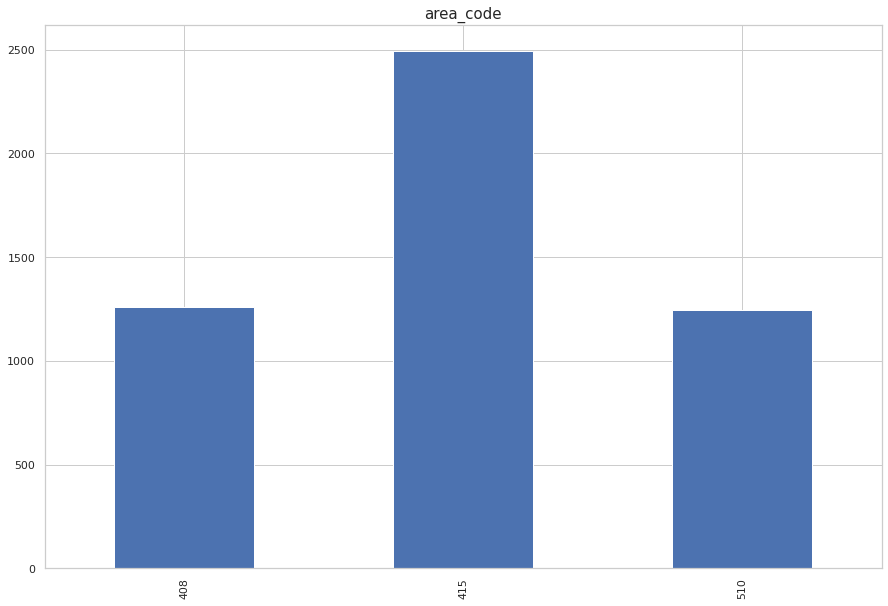

phone_number


,0
382-4657,1
328-8230,1
413-3643,1
418-9100,1
411-9481,1



intl_plan


,0
no,4527
yes,473


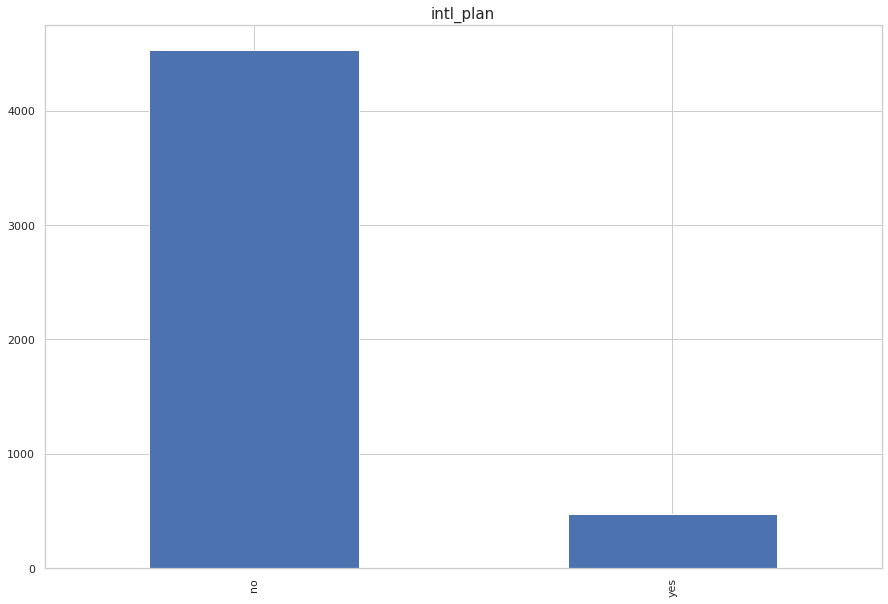

voice_mail_plan


,0
no,3677
yes,1323


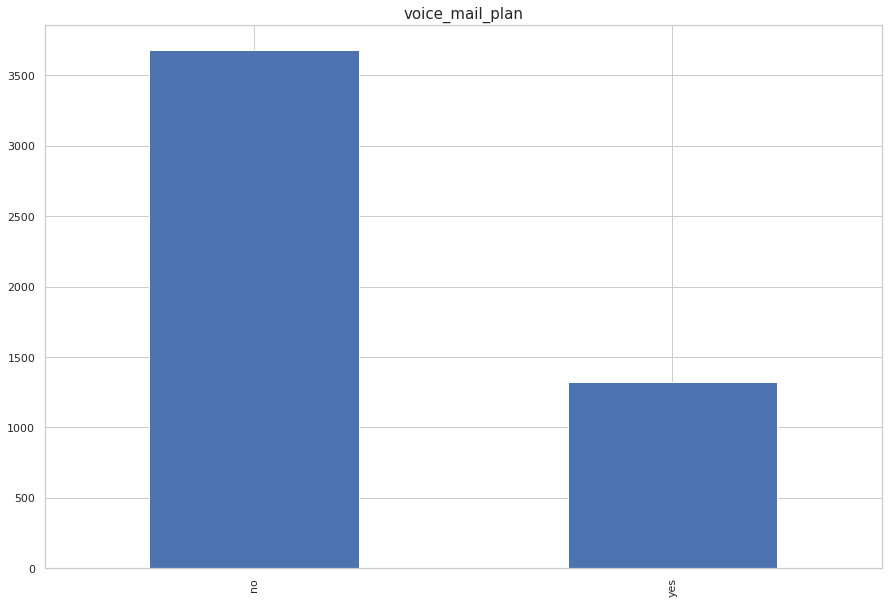

number_vmail_messages


,0
0,3678
31,83
28,67
29,67
33,66



total_day_minutes


,0
189.3,10
154.0,10
159.5,9
180.0,9
184.5,9



total_day_calls


,0
105,117
102,113
95,108
94,104
97,104



total_day_charge


,0
32.18,10
26.18,10
27.12,9
30.60,9
31.37,9



total_eve_minutes


,0
169.9,10
199.7,10
230.9,10
167.6,9
210.6,9



total_eve_calls


,0
105,115
97,110
91,110
94,106
103,106



total_eve_charge


,0
15.90,15
14.25,15
16.12,14
18.79,13
16.97,13



total_night_minutes


,0
188.2,11
194.3,11
186.2,11
214.6,10
208.9,10



total_night_calls


,0
105,121
102,109
100,108
104,106
99,105



total_night_charge


,0
9.66,19
8.47,19
10.80,18
9.63,18
8.15,18



total_intl_minutes


,0
11.1,90
9.8,88
11.3,83
11.4,81
10.1,81



total_intl_calls


,0
0,24
1,265
2,743
3,992
4,953
5,706
6,495
7,308
8,172
9,148


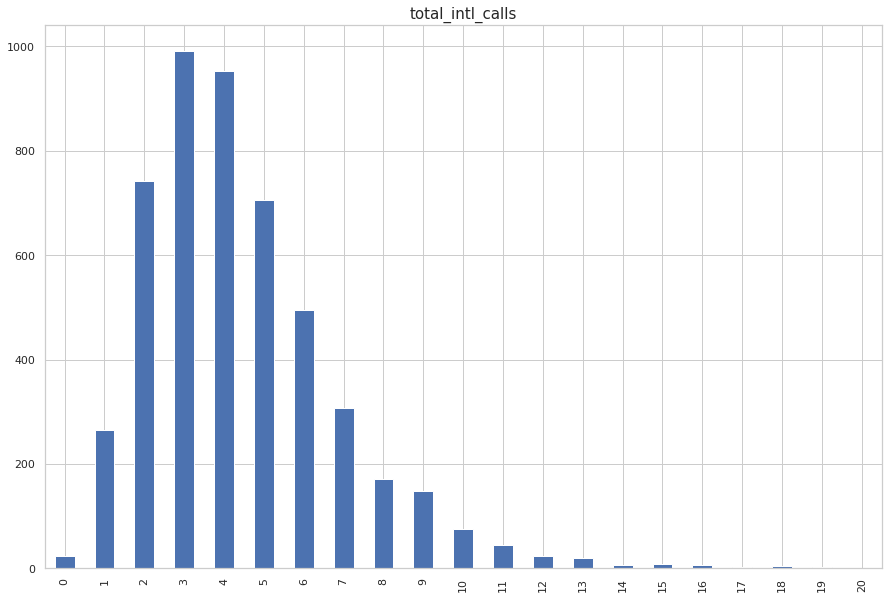

total_intl_charge


,0
3.00,90
2.65,88
3.05,83
3.08,81
2.73,81



number_customer_service_calls


,0
0,1023
1,1786
2,1127
3,665
4,252
5,96
6,34
7,13
8,2
9,2


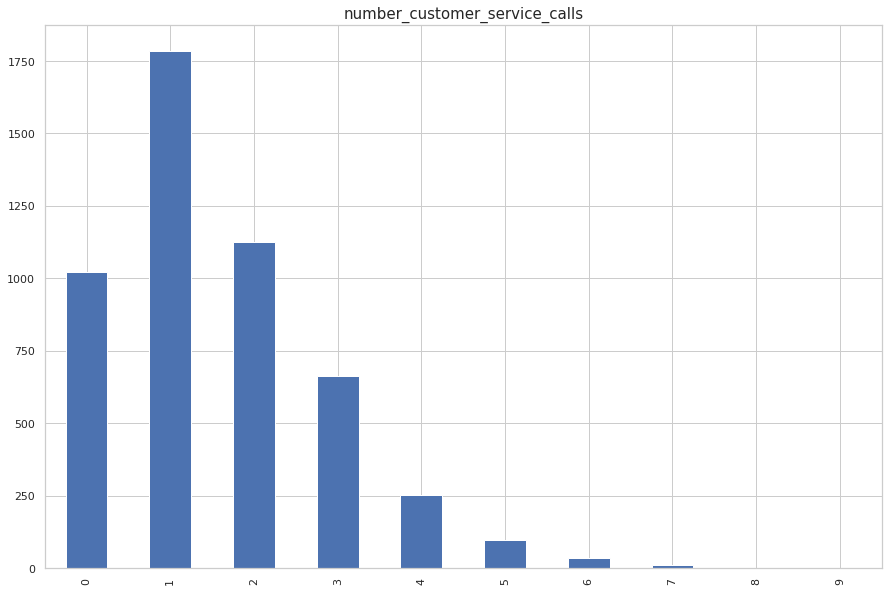

churned


,0
False,4293
True,707


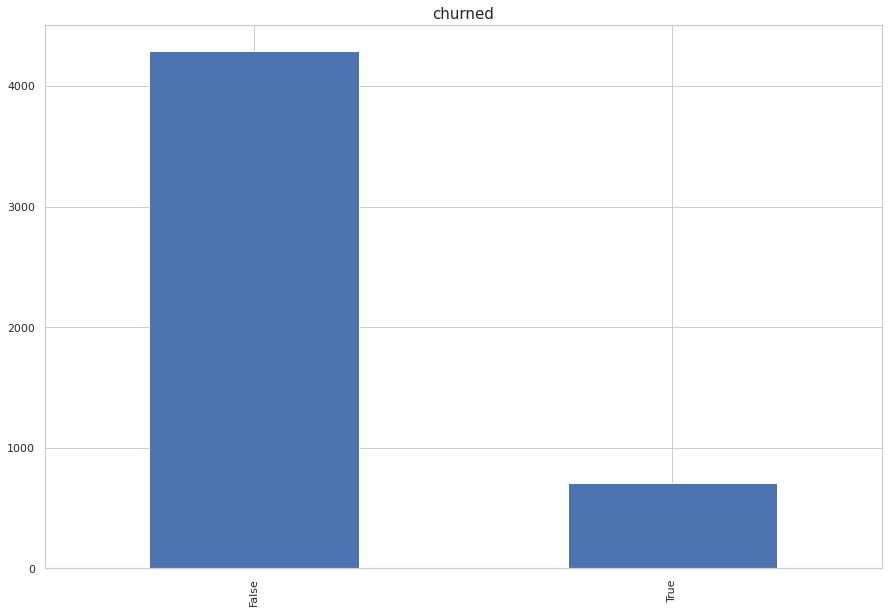

In [61]:
from IPython.display import display, HTML
from collections import Counter


sns.set(style="whitegrid")
for column in contas.columns:
    counts = Counter(contas[column].to_list())
    df_column = pd.DataFrame.from_dict(counts, orient='index')
    
    if len(df_column.index) <= 30 and len(df_column.index) > 1:
        print(column)
        display(HTML(df_column.sort_index().to_html()))
        print()
        
        ax = df_column.sort_index().plot(kind='bar', figsize=(15, 10))
        ax.get_legend().remove()
        plt.title(column, size = 15)
        #plt.savefig(os.path.join("resultados", "{}.png".format(column)))
        plt.show()
    else: 
        print(column)
        display(HTML(df_column.sort_values(by=0, ascending=False).head(5).to_html()))
        print()

In [75]:
contas.drop(columns="phone_number", axis = 1 , inplace=True)
contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   intl_plan                      5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-null   f

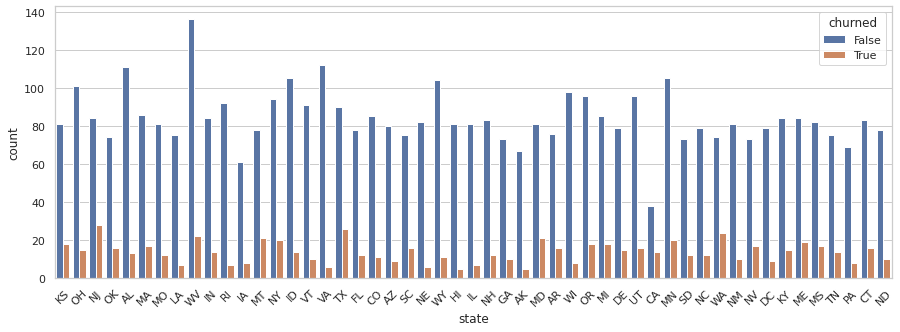

In [82]:
plt.figure(figsize=(15,5))
sns.countplot(x="state", hue="churned",
                 data=contas, palette='')
plt.xticks(rotation=45)
plt.show()

## Binarização dos dados categóricos

In [37]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['state','intl_plan', 'voice_mail_plan', 'churned']:
    contas[col] = lb.fit_transform(contas[col])

## Seleção de features

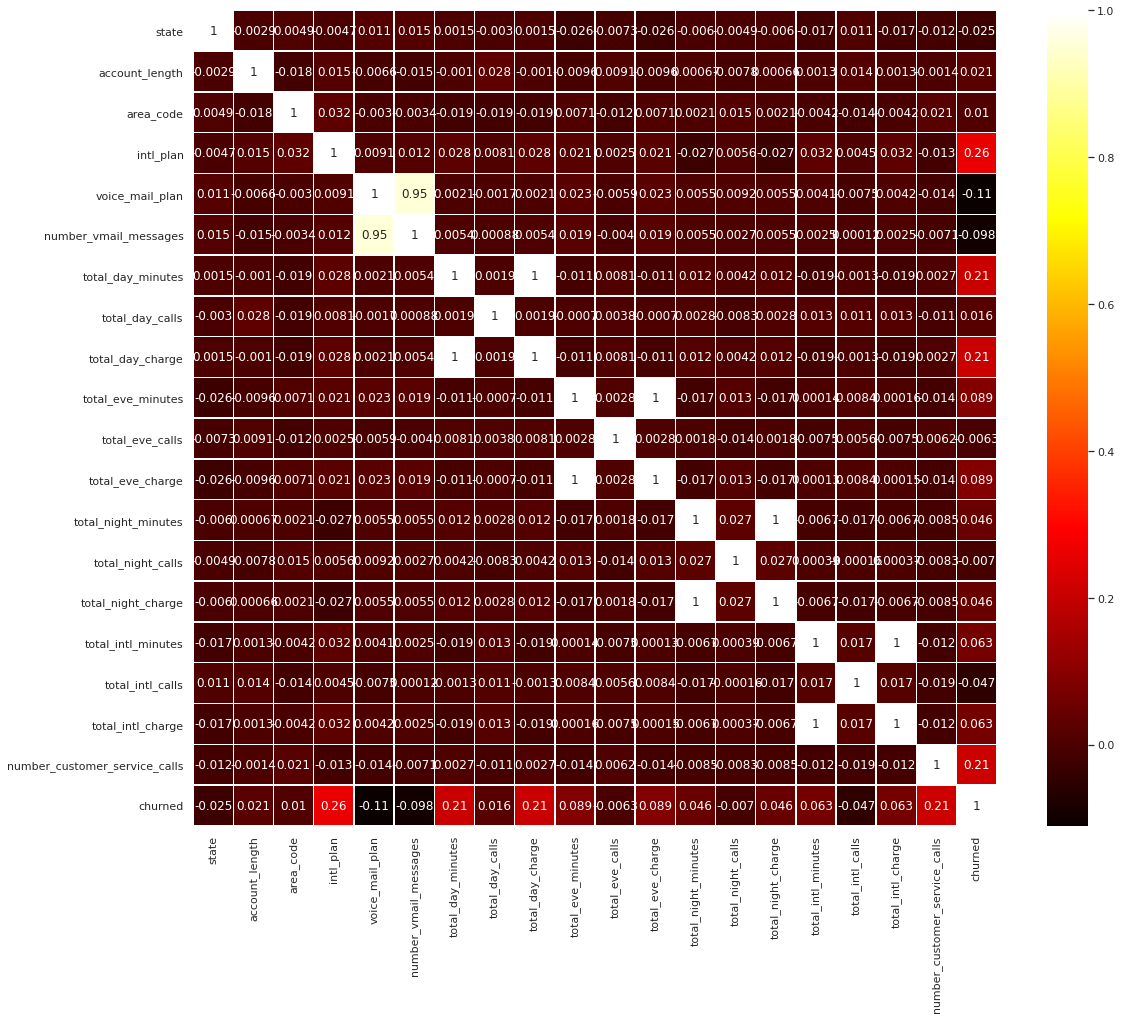

In [40]:
fig_dims = (18, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(contas.corr(), annot = True, cmap="hot",  linewidths=.5, ax=ax)

number_vmail_messages, total_day_charge, total_ve_charge, total_minutes_charge, total_intl_charge

## Verificando os dados das variáveis

In [41]:
contas.describe()

,state,account_length,area_code,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.014400,100.25860,436.911400,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,0.119145,39.69456,42.209182,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.000000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,73.00000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,0.000000,100.00000,415.000000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,0.000000,127.00000,415.000000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,1.000000,243.00000,510.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


# Verificando a base atual

## Normalizando as escalas via MinMax
* (dia, minuto) 
* Default 0 e 1

In [43]:
from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

contas = pd.DataFrame(msc.fit_transform(contas),
                      columns=contas.columns)

Valors de K tendem a ser impares para não ter ricos de empate

## Separando os dados das classes

In [44]:
X = contas.drop('churned', axis=1)
Y = contas['churned']

## Separando os dados de treino e teste

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 32)

## Criando o modelo (KNN)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

## Matriz de confusão, Relatório de Classificação e Acurácia

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [48]:
print(confusion_matrix(Y_test, pred))

[[851  21]
 [ 73  55]]


In [49]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       872
         1.0       0.72      0.43      0.54       128

    accuracy                           0.91      1000
   macro avg       0.82      0.70      0.74      1000
weighted avg       0.90      0.91      0.90      1000



In [50]:
print(accuracy_score(Y_test, pred))

0.906


Apesar da alta acurácia de 0.91 é possível perceber que o recall (número de acertos) para a classe 1 é bastante baixo sendo apenas 0.45.

Depois da análise percebemos que as classes estão desbalanceadas, ou seja, existem mais amostras da classe 0 (Não) do que da classe 1 (Sim)

## Métodos para lidar com dados desbalanceados

### Undersampling (subamostragem)
É uma técnica utilizada para reduzir de forma aleatório os elementos da classe com maior número de amostras

Alguns Algoritmos:

* NearMiss
* Random undersampling
* Cluster
* Tomek links


### Oversample (superamostragem)
É uma técnica utilizada para redreplicar de forma aleatório os elementos da classe com menor número de amostras

Alguns Algoritmos:

* Random oversampling
* SMOTE
* ADASYN

## Instalando a biblioteca imblearn

In [ ]:
!pip install imblearn

## Undersampling com NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X = contas.drop('churned', axis=1)
Y = contas['churned']
X, Y = nr.fit_sample(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Após vamos verificar a quantidade de amostras das classes

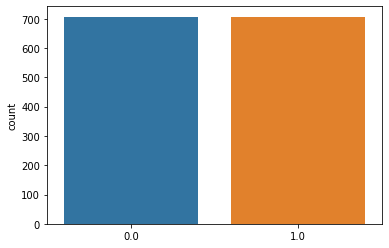

In [ ]:
ax = sns.countplot(x=Y)

Separando novamente os dados de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 32)

Criando o modelo novamente

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

Matriz de confusão, Relatório de Classificação e Acurácia

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Matriz de Confusão:')
print(confusion_matrix(Y_test, pred))
print('Relatório de Classificação:')
print(classification_report(Y_test, pred))
print('Acurácia:')
print(accuracy_score(Y_test, pred))

Matriz de Confusão:
[[119  13]
 [ 64  87]]
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.65      0.90      0.76       132
         1.0       0.87      0.58      0.69       151

    accuracy                           0.73       283
   macro avg       0.76      0.74      0.72       283
weighted avg       0.77      0.73      0.72       283

Acurácia:
0.7279151943462897


Podemos observar que a acurácia diminuiu, mas em contra partida o recall para classe 1 aumentou.

## Oversample com SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X = contas.drop('churned', axis=1)
Y = contas['churned']
X, Y = smt.fit_sample(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Após vamos verificar a quantidade de amostras das classes

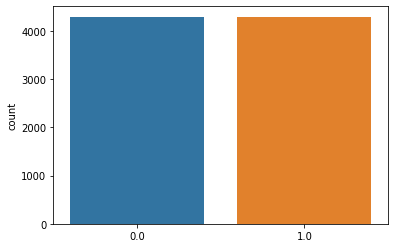

In [ ]:
ax = sns.countplot(x=Y)

Separando novamente os dados de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 32)

Criando o modelo novamente

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

Matriz de confusão, Relatório de Classificação e Acurácia

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Matriz de Confusão:')
print(confusion_matrix(Y_test, pred))
print('Relatório de Classificação:')
print(classification_report(Y_test, pred))
print('Acurácia:')
print(accuracy_score(Y_test, pred))

Matriz de Confusão:
[[731 156]
 [  4 827]]
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90       887
         1.0       0.84      1.00      0.91       831

    accuracy                           0.91      1718
   macro avg       0.92      0.91      0.91      1718
weighted avg       0.92      0.91      0.91      1718

Acurácia:
0.9068684516880093


Utilizando o algoritmo  de SMOTE podemos observar que a acurácia permaneceu quase a mesma, mas em contra partida o recall para classe 1 aumentou bastante.

## Verificando overfitting(Sobrajuste)/underfitting(Sobajuste)

Overfitting ->  Refere à situação em que um modelo se ajusta muito aos dados de treinamento. (Muito Treinado)

Underfitting -> Refere à situação em que um modelo se não se ajusta de forma adequada aos dados de treinamento. (Pouco Treinando)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 32)

In [ ]:
neighbors = np.arange(1, 10)
train_scores = []
test_scores = []

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn = knn.fit(X_train, Y_train)

  # Dados de treino
  train_pred = knn.predict(X_train)
  train_acc = accuracy_score(Y_train, train_pred)
  train_scores.append(train_acc)


  # Dados de teste
  test_pred = knn.predict(X_test)
  test_acc = accuracy_score(Y_test, test_pred)
  test_scores.append(test_acc)

  print('>%d, train: %.3f, test: %.3f' % (k, train_acc, test_acc))

NameError: ignored

NameError: ignored

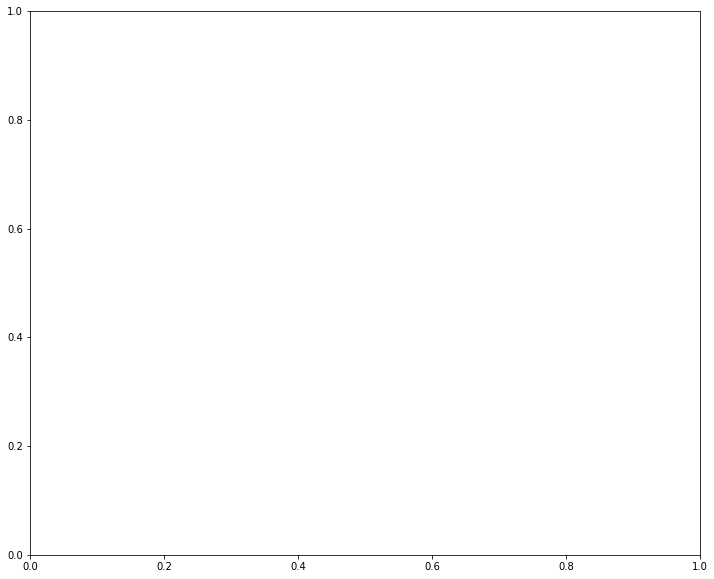

In [ ]:
# Grafico de treino e teste scores vs número de k-vizinhos
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)

ax.plot(neighbors, train_scores, '-o', label='Train')
ax.plot(neighbors, test_scores, '-o', label='Test')
ax.legend()

#definindo nome do eixo X
plt.xlabel('K-vizinhos')

#definindo nome do eixo Y
plt.ylabel('Score')

plt.title('Verificando overfitting/underfitting')
plt.show()
